In [97]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import itertools

In [4]:
os.chdir("/Users/bryceturner/Personal_Projects/MagicNFL/")

In [6]:
os.listdir()

['.DS_Store',
 'input',
 'exploration',
 'README.md',
 'req',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git',
 'src']

In [12]:
(pd.read_csv("input/week1.csv")
   .query('(gameId==2021090900) & (playId==97)')
)

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,2021090900,97,NaN,39,2021-09-10T00:26:34.900,NaN,football,right,33.25,21.79,1.05,0.81,0.10,NaN,NaN,None
985,2021090900,97,NaN,40,2021-09-10T00:26:35.000,NaN,football,right,36.55,19.21,12.00,0.08,4.19,NaN,NaN,pass_forward
986,2021090900,97,NaN,41,2021-09-10T00:26:35.100,NaN,football,right,37.77,18.49,12.08,2.11,1.42,NaN,NaN,None
987,2021090900,97,NaN,42,2021-09-10T00:26:35.200,NaN,football,right,38.91,17.79,12.59,6.81,1.34,NaN,NaN,None


In [94]:
class field_square:
    def __init__(self, center, side_length, units="yrds"):
        self.center=center
        self.side_length=side_length
        self.units=units
        
    def set_square_corners(self):
        """  
        Calulates the perimeter of the square 
            Returns the points in the following order:
               (x_1, y_1)     (x_2, y_2) 
               
               (x_3, y_3)     (x_4, y_4)  
        """
        x_0=self.center[0]-(self.side_length/2)
        y_0=self.center[1]+(self.side_length/2)

        x_1=self.center[0]+(self.side_length/2)
        y_1=self.center[1]+(self.side_length/2)

        x_2=self.center[0]-(self.side_length/2)
        y_2=self.center[1]-(self.side_length/2)

        x_3=self.center[0]+(self.side_length/2)
        y_3=self.center[1]-(self.side_length/2)
        
        self.square_corners=[(x_0, y_0), (x_1, y_1), 
                         (x_2, y_2), (x_3, y_3)]

In [158]:
class field(field_square):
    """ Choosing to set the lims NOT as the center points, but as the entire area of the field that must be covered
    I think it will be more straight forward to feed the data in this way"""
    
    """ One funny thing is that the [0,0] of a matrix is the TOP left, 
    but [0,0] of the field is the BOTTOM left"""
    def __init__(self, xlims, ylims, side_length, units="yrds"):
        self.xlims=xlims
        self.ylims=ylims
        self.side_length=side_length
        self.units=units
    
    def set_field_squares(self):
        corners = [list(range(field_1.xlims[0],field_1.xlims[1], self.side_length)), 
                   list(range(field_1.ylims[0],field_1.ylims[1], self.side_length))]
        
        field_squares=[]
        for bottom_left_corner in itertools.product(corners):
            center=(bottom_left_corner[0]+self.side_length/2, 
                    bottom_left_corner[1]+self.side_length/2)
            
            tmp = field_square(center, self.side_length)
            tmp = tmp.set_square_corners()
            field_squares.append(tmp)
        
field_1=field((0,20), (0, 15), 1)

field_1.set_field_squares()

TypeError: 'list' object is not callable

In [133]:
for i in range(0, 10, 2):
    print(i)

0
2
4
6
8


In [151]:
bottom_left_corners = [range(field_1.xlims[0],field_1.xlims[1], field_1.side_length), 
                       range(field_1.ylims[0],field_1.ylims[1], 2)]

combinations = [p for p in itertools.product(*list)]
all_field_squares=[(c[0]+.5, c[1]+.5) for c in combinations]
all_field_squares=[field_square(c, 1) for c in all_field_squares]

array_test=np.array(all_field_squares)
shape=(15, 20)
array_test.reshape(shape)

array([[<__main__.field_square object at 0x7fd1cd3f3df0>,
        <__main__.field_square object at 0x7fd1cd34e4c0>]], dtype=object)

In [131]:
20*15

300

In [96]:
x_min=(field_1.xlims[0])
y_min=(field_1.xlims[0])
side_length=1

box1=field_square((x_min+side_length/2, y_min+side_length/2), side_length)
box1.set_square_corners()
box1.square_corners



TypeError: 'tuple' object cannot be interpreted as an integer

In [92]:
sq1=field_square((0,0),1)

sq1.set_square_corners()

sq1.box_coords

[(-0.5, 0.5), (0.5, 0.5), (-0.5, -0.5), (0.5, -0.5)]

In [38]:
x_0=0
y_0=0
side_length=1

In [45]:
x_1=x_0-(side_length/2)
y_1=y_0+(side_length/2)

x_2=x_0+(side_length/2)
y_2=y_0+(side_length/2)

x_3=x_0+(side_length/2)
y_3=y_0-(side_length/2)

x_4=x_0-(side_length/2)
y_4=y_0-(side_length/2)

(-1.0, 1.0)

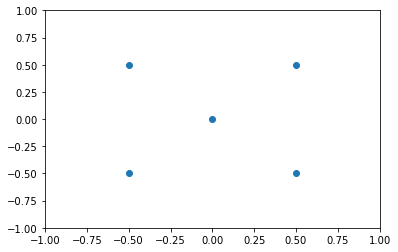

In [46]:
plt.scatter([x_0, x_1, x_2, x_3, x_4], 
            [y_0, y_1, y_2, y_3, y_4])

plt.ylim(-1,1)
plt.xlim(-1,1)